# Discrete Distributions

Data visualization of discrete distributions with the help of graphs and plots.

## Importing libraries and load data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

print(pd.__version__)
print(np.__version__)

2.1.1
1.26.1


In [2]:
# Loading data
data = pd.read_csv('datasets/churn_prediction.csv')

# Printing the data
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [3]:
# Shape and columns of the data
print('Shape:', data.shape)
print('Columns:', data.columns)

Shape: (28382, 21)
Columns: Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')


## Basics of discrete distributions 

In [4]:
# Distribution of gender
data['gender'].value_counts()

gender
Male      16548
Female    11309
Name: count, dtype: int64

**Inference:** Number of male customers is greater than number of female customers.

In [ ]:
# Distribution of gender by %
data['gender'].value_counts(normalize=True)

Male      0.594034
Female    0.405966
Name: gender, dtype: float64

**Inference:** Approximately 60% customers are male customers and rest 40% are female customers.

In [5]:
# Print the unique number of occupations
print(data['occupation'].nunique())

# Print the occupation with the highest number
print(data['occupation'].mode())

5
0    self_employed
Name: occupation, dtype: object


In [6]:
# Checking the number
data['occupation'].value_counts()

occupation
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: count, dtype: int64

**Inferences:**
- There are total 5 different occupations.
- For occupation category, Most number of customers will follow **'Self employed'** occupation.
- Few people follow only **company** related occupations.

## Bernoulli Distributions

There are more male customers than the female customers who are churning.

<Figure size 896x672 with 0 Axes>

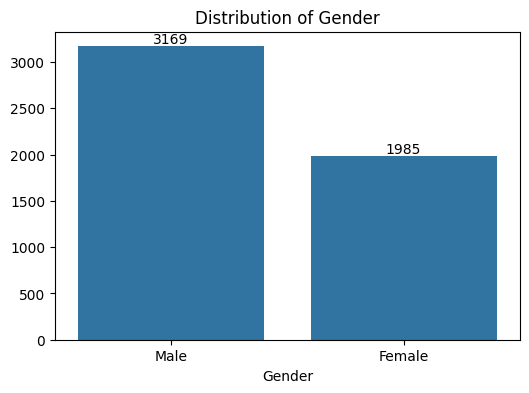

In [13]:
plt.figure(dpi = 140)
plt.figure(figsize = (6, 4))

# Creating a barplot
ax = sns.barplot(x = data[data['churn'] == 1]['gender'].value_counts().index, 
                 y = data[data['churn'] == 1]['gender'].value_counts().values, 
                 orient = 'v')

# This will print the % age instead.
# ax = sns.barplot(x = data[data['churn'] == 1]['gender'].value_counts().index, 
#                  y = data[data['churn'] == 1]['gender'].value_counts(normalize=True).values, 
#                  orient = 'v')

plt.title('Distribution of Gender')
plt.xlabel('Gender')
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height()), ha = 'center', va = 'bottom', color = 'black')
        
plt.show()

## Categorical distributions

<Figure size 896x672 with 0 Axes>

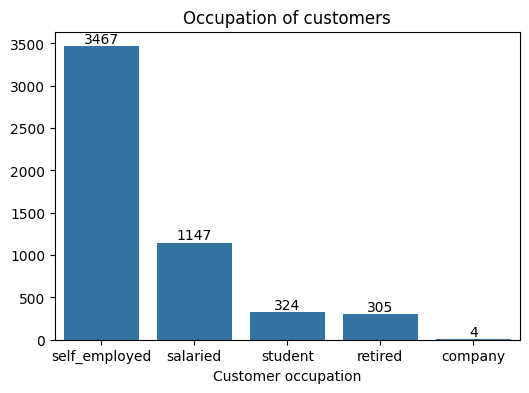

In [16]:
plt.figure(dpi = 140)
plt.figure(figsize = (6, 4))

ax = sns.barplot(x = data[data['churn'] == 1]['occupation'].value_counts().index, 
            y = data[data['churn'] == 1]['occupation'].value_counts().values, 
            orient = 'v')

# This will print the % age instead.
# ax = sns.barplot(x = data[data['churn'] == 1]['occupation'].value_counts().index,
# y = data[data['churn'] == 1]['occupation'].value_counts(normalize=True).values, 
# orient = 'v')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height()), ha = 'center', va = 'bottom', color= 'black')

plt.xlabel('Customer occupation')
plt.title('Occupation of customers')

plt.show()

**Inferences Drawn:**
- Highest Number of Customers are churning from self employed profession followed by salaried.
- Number of Customers who are churning from Student and retired category are close to each other.
- Company as a profession has the least number of customers who are churning.